# Assignment

In this assignment, we want to read in the `retail-churn.csv` dataset and run some EDA on the data. Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [1]:
import pandas as pd

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("../data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


Here are some examples of questions we can be asking:

1. What are the columns, their types and their distribution (when it makes sense)? <span style="color:red" float:right>[1 point]</span>

I used .columns to show the name of the columns, .dtypes to show the type of each variable and then .describe to show the basic distribution of the variables quantity and dollars. I only did four because the other variables dont make sense to do because they are ID numbers and an address. I put the ### in so the output is a bit easier to read. 

In [2]:

print("the columns are:")
print(list(churn.columns))
print("############################")
print (" The types are:")
print(churn.dtypes)
print("###############################")
print("The distribution of quantity is")
print(churn.quantity.describe())
print("###############################")
print("The distribution of dollar is")
print(churn.dollar.describe())
print("################################")
print ("The distribution of gender is")
print(churn.gender.describe())
print(churn.gender.value_counts())
print('#################################')
print("The distribution of timestamp is ")
print(churn.timestamp.describe())
print(churn.timestamp.value_counts())
print('###################################')


the columns are:
['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
############################
 The types are:
user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object
###############################
The distribution of quantity is
count    252204.000000
mean          1.385692
std           3.705732
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1200.000000
Name: quantity, dtype: float64
###############################
The distribution of dollar is
count    252204.000000
mean        130.911389
std         388.142169
min           1.000000
25%          42.000000
50%          76.000000
75%         132.000000
max       70589.000000
Name: dollar, dtype: float64
################################
The distribution of gender is
count     25220

I was a bit surprised by the output. Quantity seems to have an outlier since the min 25%,50% and 75% are all one but the max is 1200. The gender variable needs a code book to be able to inturpret since I dont know what the letters stand for. 

2. Do the columns have the right types for the analysis? If not, convert them to the right type. <span style="color:red" float:right>[1 point]</span>

user_id, store_id, trans_id and item_id all need to be strings because we are not using them as numbers but as identification ie. categorical variables.  

In [3]:
churn.to_string('user_id')
churn.to_string('trans_id')
churn.to_string('item_id')
churn.to_string('store_id')

3. Do any columns appear to have all rows with unique categories? How do we show that? <span style="color:red" float:right>[1 point]</span>

The only column that has all unqiue value for all the rows is transaction id. This makes sense, the other one that I thought might be unique is user id, but its not because people can make more than one transaction and therefore the user id can be repeated. Using the n.uqniue function allows us to see how many unqiue rows there are. For there not to be any repeats there needs to be 25,2204.

In [4]:
print("Total number of rows")
print(len(churn))

print(churn.trans_id.nunique())
print(churn.quantity.nunique())
print(churn.dollar.nunique())
print(churn.user_id.nunique())
print(churn.trans_id.nunique())
print(churn.gender.nunique())
print(churn.address.nunique())
print(churn.store_id.nunique())
print(churn.timestamp.nunique())
print(churn.item_id.nunique())


Total number of rows
252204
252204
62
1602
10000
252204
11
8
252204
120
2818


4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or dollar ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - What is the date range covered by the data? <span style="color:red" float:right>[1 point]</span>  
     HINT: You will need to convert `timestamp` into an a `datetime` column. You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.


I dont see any negative numbers for quantity or for dollars. This makes sense being you cant have a neagative amount of something or of money. However it still could be possible to get a negative number in the dataset if someone used say -999 to indicate that the value was missing. 

In [14]:
# we filter the columns into a list of Booleans given our condition
# sum() gives us the count of True's we have in the list
print((churn.quantity< 0).sum())
print((churn.dollar< 0).sum())

0
0


I changed timestamp into a date time and then had to add the new column to the dataframe. 

In [15]:
date = pd.to_datetime(churn.timestamp)
churn.insert(0,"date", date) # this is how we add the new column to the date frame
                            #0 indicates what position you want the new column in 
churn.head()


,date,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,2000-11-01,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,2000-11-01,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,2000-11-01,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,2000-11-01,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,2000-11-01,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


I learned that datetime does not yet treat datetimes as numeric so i had to force it to by using the datetime_is_numeric=True.
The date range is starting at November 1st 2000 and ending Feburary 28th 2001. 

In [16]:
churn.date.describe(datetime_is_numeric=True)

count                           252204
mean     2000-12-31 04:58:59.192082560
min                2000-11-01 00:00:00
25%                2000-11-28 00:00:00
50%                2001-01-02 00:00:00
75%                2001-01-31 00:00:00
max                2001-02-28 00:00:00
Name: date, dtype: object

I wanted to check and is if there was any missing data in the data frame and there isn't

In [17]:

len(churn.item_id[churn.item_id.isna()])


0

In [18]:
print(churn.isnull().any())

date         False
user_id      False
gender       False
address      False
store_id     False
trans_id     False
timestamp    False
item_id      False
quantity     False
dollar       False
dtype: bool


5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least two questions and answer them using statistical summaries or visualizations:
   <span style="color:red" float:right>[2 point]</span>
   - How many transactions on average do all known users together have in an average week?
The result is the total number of transactions normalized to one week.

   - Are there items that are more commonly sold in bulk (quantity greater than 1)? <span style="color:red" float:right>[2 point]</span>
   - How do quantity and volume tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intetionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

In order to answer the question "How many transactions on average do all known users together have in an average week?" I first created variables for number of users and number of transactions (which was the number of rows). I than found the first date of transactions and the last date using the min/max function. To calculate the total number of days I subtracted the max date variable from the min date variable. I then needed to convert it to an integer using the .days function. This is a built in time delta function. I then created a variable to find out the average transactions for all users in a week which is number of tranactions divided by number of days and then multiplied by 7. I took it one step futher by then divided it by number of users. I did this to get a better idea of the number if found for average of transaction made sense. 

In [19]:
num_users = churn.user_id.nunique()

num_transaction = len(churn.index)
#num_transaction = churn.trans_id.nunique() # I did this to double check that there is one row for each transaction. 

min_date = (min(churn["date"]))
max_date = (max(churn["date"]))

number_of_days = max_date-min_date
number_of_days = number_of_days.days


avg_tranactions_week = (num_transaction / number_of_days)* 7 # this is the average of transactions for all users in one week
print(avg_tranactions_week)

print(avg_tranactions_week/num_users) # this is the number of average transaction per user in a week. 


14835.529411764706
1.4835529411764707






What is the distribution of quantity across all transactions? How many items are sold only in bulk (quantity greater than 1)? How many items are never sold in bulk (quantity always 1)?
Use a histogram to show the distribution of quantity across all transactions.
The following cannot be answered from the histogram:
For each item, determine if that item's quantity is always greater than 1. Tally the number of such items.
For each item determine if that item's quantity is always 1. Tally the number of such items.


I did a histogram of quantity. Most of the items are sold individually or in small numbers. 

<function matplotlib.pyplot.show(close=None, block=None)>

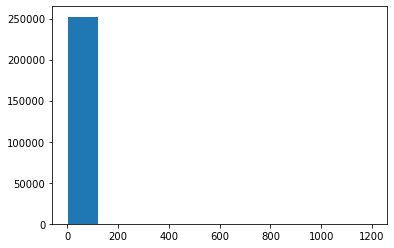

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(churn.quantity)
plt.show

I created a for loop and created a variable of items that are sold in bulk and items that are not sold in bulk. However I realized there could be some items that were sold in both so I accounted for that as well. 

In [21]:
quan_more_one = churn.quantity > 1 #this is to create a flag of items that have sold in quantity greater than one)
quan_only_one = churn.quantity == 1  # this is to creat a flag of items that have never sold in quantity greater than one)



#print(quan_more_one )

items_more_one = churn.item_id[quan_more_one]
items_more_one = set(items_more_one)

items_only_one = churn.item_id[quan_only_one]
items_only_one = set(items_only_one)

bulk_items = []

for item in items_more_one:
    if item not in items_only_one:
        bulk_items.append(item) #append adds it to the list
        
single_items = []

for item in items_only_one:
    if item not in items_more_one:
        single_items.append(item)

total_unique_items = churn.item_id.nunique()
num_bulk_items = len(bulk_items)
num_single_items = len(single_items)

print("total unique items: " + str(total_unique_items))
print("items sold only in bulk: " + str(num_bulk_items))
print("items sold only in quant 1: " + str(num_single_items))
print("items sold in quant 1 or more: " + str(total_unique_items - (num_bulk_items + num_single_items)))



#print (items_more_one.nunique())

total unique items: 2818
items sold only in bulk: 188
items sold only in quant 1: 1611
items sold in quant 1 or more: 1019


6. Do the results mesh with what we expected? Note that to answer this we need to have some domain knowledge, so you can ignore this for the assignment. <span style="color:red" float:right>[0 point]</span>

7. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

One thing we could be interested in is if there is a certain day of the week that more transactions occur ie. a day that people shop more. We can find that out by using the date variable we created and checking for the day of the week. To do that we can use the day_of_week function. I created a loop function to created a new variable of day of the week. I then made a histogram to see a visualization of the distrubution. In this case 0 is Monday 1 is Tuesday etc. You can see that the weekend has higher sells and in particular Sunday. 

(array([32750., 27694.,     0., 26505.,     0., 27445., 27557.,     0.,
        47447., 62806.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

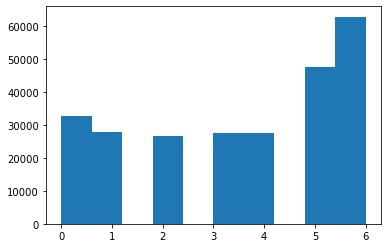

In [23]:

day_week = []
for date in churn.date:
    day_week.append(date.day_of_week) # created a for loop to create a new list of the day of the week 

churn.day_week = day_week



churn.insert(0,"day_of_the_week", day_week) # this is how we add the new column to the date frame
                            #0 indicates what position you want the new column in 
churn.head()

plt.hist(churn.day_of_the_week)

8. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

I decided to do a pairplot to see if there were any interesting relationships between any of the data. Many of the scatterplots arn't that interesting because they are id numbers. Something that I was anticipating but that I dont really see is I thought that the items sold in greater quntities would be less dollars but this doesn't seem to be the case overall. 

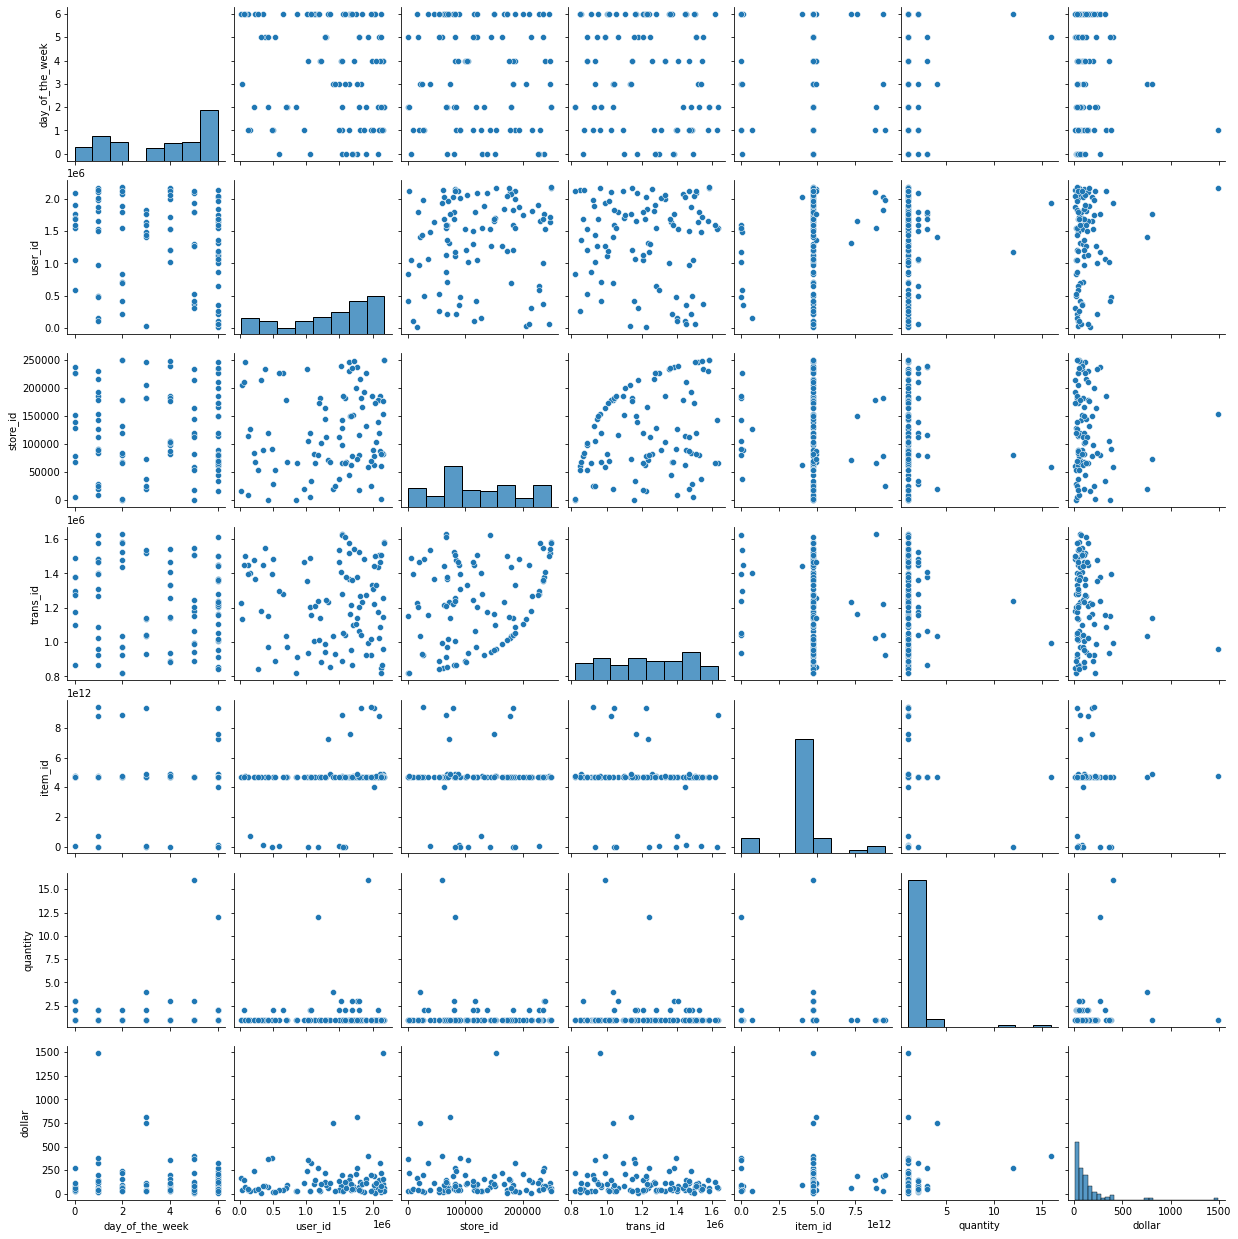

In [24]:
import seaborn as sns




sns.pairplot(churn.sample(100));

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can used to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

# End of assignment